In [813]:
import pandas as pd
import numpy as np
import cufflinks as cf
import seaborn as sns
%matplotlib inline
from plotly import __version__
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
print(__version__) # requires version >= 1.9.0

5.15.0


# Comprensión de los Datos

## Base de Datos

In [814]:
df = pd.read_csv("../data/bike_buyers.csv")

In [815]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [817]:
df.shape

(1000, 13)

In [818]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


## Identificamos los valores nulos

In [819]:
# Número de datos ausentes por variable
# ==============================================================================
df.isna().sum().sort_values()

ID                   0
Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
Home Owner           4
Income               6
Marital Status       7
Children             8
Age                  8
Cars                 9
Gender              11
dtype: int64

In [820]:
variables_con_na = df.columns[df.isna().any()].tolist()
variables_con_na

['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars', 'Age']

In [821]:
na_values = df[df['Marital Status'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
27,18283,NaN,Female,100000.0,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No
49,14939,NaN,Male,40000.0,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
150,26154,NaN,Male,60000.0,1.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,Pacific,43.0,Yes
234,24611,NaN,Male,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,35.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes


In [822]:
#Dependiendo del numero de hijos se define si estas casado o no
fig = px.box(df, y = 'Children', x = "Marital Status", color = "Gender")
fig.show()

In [823]:
na_values_gender = df[df['Gender'].isna()]
na_values_gender

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
695,18390,Married,NaN,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No
867,26693,Married,NaN,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No
908,23195,Single,NaN,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes
951,22296,Married,NaN,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No
973,11734,Married,NaN,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No


In [824]:
na_values_income = df[df['Income'].isna()]
na_values_income

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [825]:
#Dependiendo de la educación y la ocupación se infiere la ganancia de los na's de la columna income
fig = px.box(df, y = 'Income', x = "Occupation", color = "Education")
fig.show()

In [826]:
#Se verifican que datos contienen los na's de la columna children
na_values_children = df[df['Children'].isna()]
na_values_children

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
117,24065,Single,Female,20000.0,NaN,High School,Manual,Yes,0.0,0-1 Miles,Europe,40.0,Yes
217,13673,Single,Female,20000.0,NaN,Partial High School,Manual,No,2.0,0-1 Miles,Europe,25.0,No
386,28957,Single,Female,120000.0,NaN,Partial High School,Professional,Yes,4.0,10+ Miles,Pacific,34.0,Yes
549,13453,Married,Female,130000.0,NaN,Bachelors,Management,Yes,3.0,0-1 Miles,North America,45.0,Yes
638,18949,Single,Male,70000.0,NaN,Graduate Degree,Management,Yes,2.0,5-10 Miles,North America,74.0,Yes
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
805,26778,Single,Female,40000.0,NaN,High School,Skilled Manual,Yes,2.0,5-10 Miles,North America,31.0,No
960,23491,Single,Male,100000.0,NaN,Partial College,Professional,No,4.0,1-2 Miles,North America,45.0,No


In [827]:
# Haciendo uso del gráfico de Marital Status, definimos la cantidad de hijos

In [828]:
na_values_homeOwner = df[df['Home Owner'].isna()]
na_values_homeOwner

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,NaN,0.0,0-1 Miles,Europe,38.0,Yes
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,NaN,0.0,1-2 Miles,North America,47.0,No
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No


In [829]:
#Dependiendo de la cantidad de hijos y el estado civil se infiere si tiene casa o no
fig = px.box(df, y = 'Children', x = "Home Owner", color = "Marital Status")
fig.show()

In [830]:
na_values_cars = df[df['Cars'].isna()]
na_values_cars

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
196,16209,Single,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,NaN,1-2 Miles,Europe,36.0,No
202,18626,Single,Male,40000.0,2.0,Partial College,Clerical,Yes,NaN,1-2 Miles,Europe,33.0,Yes
351,13572,Single,Male,10000.0,3.0,High School,Manual,Yes,NaN,0-1 Miles,Europe,37.0,Yes
448,11383,Married,Female,30000.0,3.0,Graduate Degree,Clerical,Yes,NaN,0-1 Miles,Europe,46.0,No
511,12207,Single,Male,80000.0,4.0,Bachelors,Management,Yes,NaN,5-10 Miles,North America,66.0,Yes
561,27218,Married,Female,20000.0,2.0,Partial High School,Clerical,No,NaN,0-1 Miles,North America,48.0,No
615,11538,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,No,NaN,0-1 Miles,North America,47.0,Yes
933,11941,Single,Male,60000.0,0.0,Partial College,Skilled Manual,Yes,NaN,5-10 Miles,North America,29.0,No


In [831]:
#Dependiendo de la cantidad de la ganancia de la personas y si tiene casa o no se infiere cuantos carros tiene
fig = px.box(df, y = 'Income', x = "Cars", color = "Home Owner")
fig.show()

In [832]:
na_values_age = df[df['Age'].isna()]
na_values_age

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
225,14135,Married,Male,20000.0,1.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,NaN,No
371,22918,Single,Male,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,NaN,No
554,18580,Married,Female,60000.0,2.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,NaN,Yes
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
770,17699,Married,Male,60000.0,1.0,Graduate Degree,Skilled Manual,No,0.0,0-1 Miles,North America,NaN,No
986,23704,Single,Male,40000.0,5.0,High School,Professional,Yes,4.0,10+ Miles,North America,NaN,Yes


In [833]:
# Se infiere la edad en función de Marital Status y la cantidad de hijos
fig = px.box(df, y = 'Age', x = "Marital Status", color = "Children")
fig.show()

# Preparación de los Datos

## Limpiamos los datos

In [834]:
#Para reemplazar los valores NA de Marital Status, primero obtenemos el porcentaje de Marital Status por Gender
distribucion_marital_status = df.groupby('Gender')['Marital Status'].value_counts(normalize=True)

print(distribucion_marital_status)

Gender  Marital Status
Female  Single            0.509240
        Married           0.490760
Male    Married           0.585859
        Single            0.414141
Name: Marital Status, dtype: float64


In [835]:
#Reemplazo de valores NA en Marital Status Según Género y cantidad de hijos
def fill_marital_status(row):
    if pd.isnull(row['Marital Status']):
        if row['Children'] <= 1:
            return 'Single'
        elif row['Children'] <= 3:
            return 'Married'
        elif row['Children'] <= 4 and row['Gender'] == 'Male':
            return 'Married'
        else:
            return 'Single'
    else:
        return row['Marital Status']
df['Marital Status'] = df.apply(fill_marital_status, axis=1)

In [836]:
#Eliminamos los na's de la columna genero ya que no se puede inferir su valor con grafico de cajas 

#Puede ser aleatorio tambien
df = df.dropna(subset=['Gender'], axis=0)
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [837]:
#Verificamos el reemplazo de todos los NA en Marital Status
na_values = df[df['Marital Status'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [838]:
#Verificamos que no hemos modificado valores diferentes a NA
distribucion_marital_status = df.groupby('Gender')['Marital Status'].value_counts(normalize=True)

print(distribucion_marital_status)

Gender  Marital Status
Female  Single            0.511247
        Married           0.488753
Male    Married           0.582000
        Single            0.418000
Name: Marital Status, dtype: float64


In [839]:
df["Income"].describe()

count       983.000000
mean      56124.109868
std       31193.712788
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [840]:
# Calcular la media de 'Income' por 'Occupation' y 'Education'
media_income = df.groupby(['Occupation', 'Education'])['Income'].transform('mean')
df['Income'].fillna(media_income, inplace=True)

In [841]:
#Verificamos el reemplazo de todos los NA en Income
na_values = df[df['Income'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [842]:
#Verificamos que no se hallan modificado valores ajenos a los NA en Income
df["Income"].describe()

count       989.000000
mean      55987.508017
std       31194.558980
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [843]:
#Información detallada de Children
df["Children"].describe()

count    982.000000
mean       1.901222
std        1.621535
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [844]:
# Calcular la media de 'Children' por 'Gender' y 'Marital Status'
media_children = df.groupby(['Gender', 'Marital Status'])['Children'].transform('mean')
df['Children'].fillna(media_children, inplace=True)

In [845]:
#Verificamos el correcto reemplazo
na_values = df[df['Children'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [846]:
#Verificamos que no se hayan modificado valores ajenos a NA
df["Children"].describe()

count    989.000000
mean       1.900143
std        1.615904
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [847]:
#Visualizamos mejor la data de Home Owner
df["Home Owner"].describe()

count     985
unique      2
top       Yes
freq      676
Name: Home Owner, dtype: object

In [848]:
#calculamos la media de Home Owner en función de Children y Marital Status
media_home_owner = df.groupby(['Children', 'Marital Status'])['Home Owner'].transform(lambda x: x.mode().iloc[0])

In [849]:
#reemplazamos los NA
df['Home Owner'].fillna(media_home_owner, inplace=True)

In [850]:
#Verificamos el reemplazo
na_values = df[df['Home Owner'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [851]:
#Verificamos la data de 'Home Owner'
df["Home Owner"].describe()

count     989
unique      2
top       Yes
freq      679
Name: Home Owner, dtype: object

In [852]:
#Obtenemos datos detallados de Cars
df["Cars"].describe()

count    980.000000
mean       1.454082
std        1.124949
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [853]:
#Definimos la cantidad de Cars en función de Income y de Home Owner
media_cars = df.groupby(['Income', 'Home Owner'])['Cars'].transform('mean')
df['Cars'].fillna(media_cars, inplace=True)

In [854]:
#Verificamos el correcto reemplazo
na_values = df[df['Cars'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No


In [855]:
#Visualizamos que no se reemplazó un NA debido a la falta de datos de personas con Income tan alto
#Ante esta situación, buscamos cuáles son las personas con mayores ingresos
personas_ingreso_alto = df.nlargest(5, 'Income')
personas_ingreso_alto

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
43,17185,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
829,16009,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
178,14191,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes


In [856]:
#Definimos la cantidad de Cars en 4, habiendo analizado la cantidad de hijos, el Income y Home Owner
df.loc[df['ID'] == 11434, 'Cars'] = 4.0

In [857]:
#Verificamos el correcto reemplazo
na_values = df[df['Cars'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [858]:
df["Cars"].describe()

count    989.000000
mean       1.454721
std        1.123220
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [859]:
df['Age'].describe()

count    982.000000
mean      44.203666
std       11.411998
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [860]:
#Cálculo de la media de edad según Marital Status y Children
media_age = df.groupby(['Marital Status', 'Children'])['Age'].transform('mean')
df['Age'].fillna(media_age, inplace=True)

In [861]:
#Verificamos el correcto reemplazo
na_values = df[df['Age'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [862]:
#Verificamos que no se hayan modificado valores ajenos a NA
df['Age'].describe()

count    989.000000
mean      44.224367
std       11.388127
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [863]:
#Verificamos que ninguna variable contenga NA's
variables_con_na = df.columns[df.isna().any()].tolist()
variables_con_na

[]

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 108.2+ KB


In [865]:
#Ahora veremos los gráficos de cada variable del data set
fig = px.box(df, x = "Income")
fig.show()

In [866]:
#Variable children
fig = px.box(df, x = "Children")
fig.show()

In [867]:
#Variable cars
fig = px.box(df, x = "Cars")
fig.show()

In [868]:
#Variable Age
fig = px.box(df, x = "Age")
fig.show()

1. Crearemos nuevas columnas de ser necesario a partir de las variables existentes.

2. Realizaremos transformaciónes de valores para atributos existentes.

## Preguntas

A partir de los datos limpios se dará respuesta a las siguientes preguntas acompañado de una visualización

1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

In [869]:
# df.info()

In [870]:
# df.groupby("Purchased Bike")["Income"].mean()

2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

In [871]:
# df.groupby("Marital Status")["Income"].mean()

3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [872]:
# df["Con_hijos"] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')
# df

4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [873]:
# df["Con_vehiculo"] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')
# df

5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [874]:
# df.groupby("Home Owner")["Age"].mean()

# Requerimientos

## ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

In [875]:
# 1. Promedio de ingresos según si la bicicleta fue comprada o no
promedio_ingresos_compra = df.groupby('Purchased Bike')['Income'].mean()

# Visualización con Plotly
fig = px.bar(promedio_ingresos_compra, x=promedio_ingresos_compra.index, y='Income',
             labels={'x': 'Compra de bicicleta', 'y': 'Promedio de ingresos'},
             title='Promedio de ingresos según compra de bicicleta')
fig.show()

## ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

In [876]:
# 2. Promedio de ingresos según el estado civil
promedio_ingresos_estado_civil = df.groupby('Marital Status')['Income'].mean()

# Visualización con Plotly: Gráfico de barras agrupadas
fig = px.bar(promedio_ingresos_estado_civil, x=promedio_ingresos_estado_civil.index, y='Income',
             labels={'x': 'Estado civil', 'y': 'Promedio de ingresos'},
             title='Promedio de ingresos según estado civil',
             barmode='group')
fig.show()

 ## Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [877]:
# 3. Crear la variable 'Con_hijos' y calcular el promedio de hijos según el nivel educativo
df3 = df.copy()
df3['Con_hijos'] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')
promedio_hijos_nivel_educativo = df3.groupby('Education')['Children'].mean()

# Visualización con Plotly: Gráfico de dispersión
fig = px.scatter(promedio_hijos_nivel_educativo, x=promedio_hijos_nivel_educativo.index, y='Children',
                 labels={'x': 'Nivel educativo', 'y': 'Promedio de hijos'},
                 title='Promedio de hijos según nivel educativo')
fig.show()


## Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [878]:
# 4. Crear la variable 'Con_vehiculo' y calcular el promedio de vehículos según la ocupación
df4 = df.copy()
df4['Con_vehiculo'] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')
promedio_vehiculos_ocupacion = df4.groupby('Occupation')['Cars'].mean()

# Visualización con Plotly: Gráfico de área
fig = px.area(promedio_vehiculos_ocupacion, x=promedio_vehiculos_ocupacion.index, y='Cars',
              labels={'x': 'Ocupación', 'y': 'Promedio de vehículos'},
              title='Promedio de vehículos según ocupación')
fig.show()

## ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [879]:
# 5. Promedio de edad según si el cliente es propietario de una vivienda o no
promedio_edad_propietario_vivienda = df.groupby('Home Owner')['Age'].mean()

# Visualización con Plotly: Gráfico de línea
fig = px.line(promedio_edad_propietario_vivienda, x=promedio_edad_propietario_vivienda.index, y=promedio_edad_propietario_vivienda.values,
labels={'x': 'Propietario de vivienda', 'y': 'Promedio de edad'},
title='Promedio de edad según propietario de vivienda')
fig.show()


En el código actualizado, se utilizan los siguientes tipos de gráficos:

1. Gráfico de barras: Se utiliza para visualizar el promedio de ingresos según si la bicicleta fue comprada o no.
2. Gráfico de barras agrupadas: Se utiliza para visualizar el promedio de ingresos según el estado civil.
3. Gráfico de dispersión: Se utiliza para visualizar el promedio de hijos según el nivel educativo.
4. Gráfico de área: Se utiliza para visualizar el promedio de vehículos según la ocupación.
5. Gráfico de línea: Se utiliza para visualizar el promedio de edad según si el cliente es propietario de una vivienda o no.

Recuerda que es posible ajustar los detalles de cada visualización según tus necesidades.


# Construir Datos

## Variable Objetivo

In [880]:
# Frecuencia de la variable objetivo
df['Purchased Bike'].value_counts()

No     511
Yes    478
Name: Purchased Bike, dtype: int64

In [881]:
df['Purchased Bike'].value_counts()/df.shape[0]

No     0.516684
Yes    0.483316
Name: Purchased Bike, dtype: float64

In [882]:
## Convertir variable
df['Target'] = df['Purchased Bike'].replace({'No': 0,'Yes': 1})

In [883]:
df = df.drop(['Purchased Bike'], axis = 1)

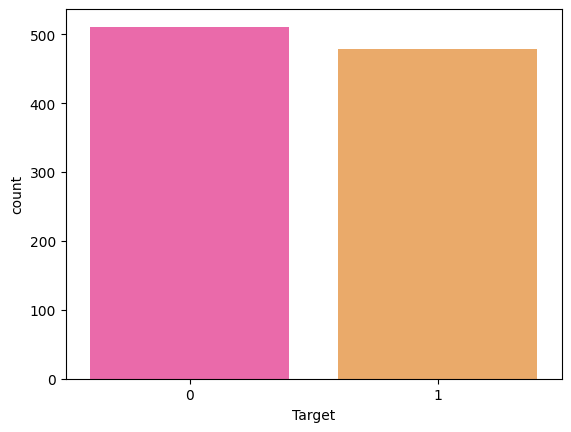

In [884]:
sns.countplot(x = 'Target', data=df, palette = 'spring')
plt.savefig('Numero_ventas.png', bbox_inches='tight')

In [885]:
# Guardamos los identificadores de cliente y los excluimos del análisis de variables
df_index = df[['ID','Target']]
df = df.drop(['ID'], axis = 1)
df

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Target
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1
5,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,0
995,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,1
996,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,1
998,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,0


## Variables numèricas

In [886]:
numericas= df.select_dtypes(include=['float64', 'int'])

In [887]:
# Variables numéricas
# ==============================================================================
# df.select_dtypes(include=['float64', 'int']).describe()
numericas.describe()
numericas

,Income,Children,Cars,Age,Target
0,40000.0,1.0,0.0,42.0,0
1,30000.0,3.0,1.0,43.0,0
2,80000.0,5.0,2.0,60.0,0
4,30000.0,0.0,0.0,36.0,1
5,10000.0,2.0,0.0,50.0,0
...,...,...,...,...,...
994,80000.0,5.0,3.0,46.0,0
995,60000.0,2.0,2.0,54.0,1
996,70000.0,4.0,0.0,35.0,1
998,100000.0,3.0,3.0,38.0,0


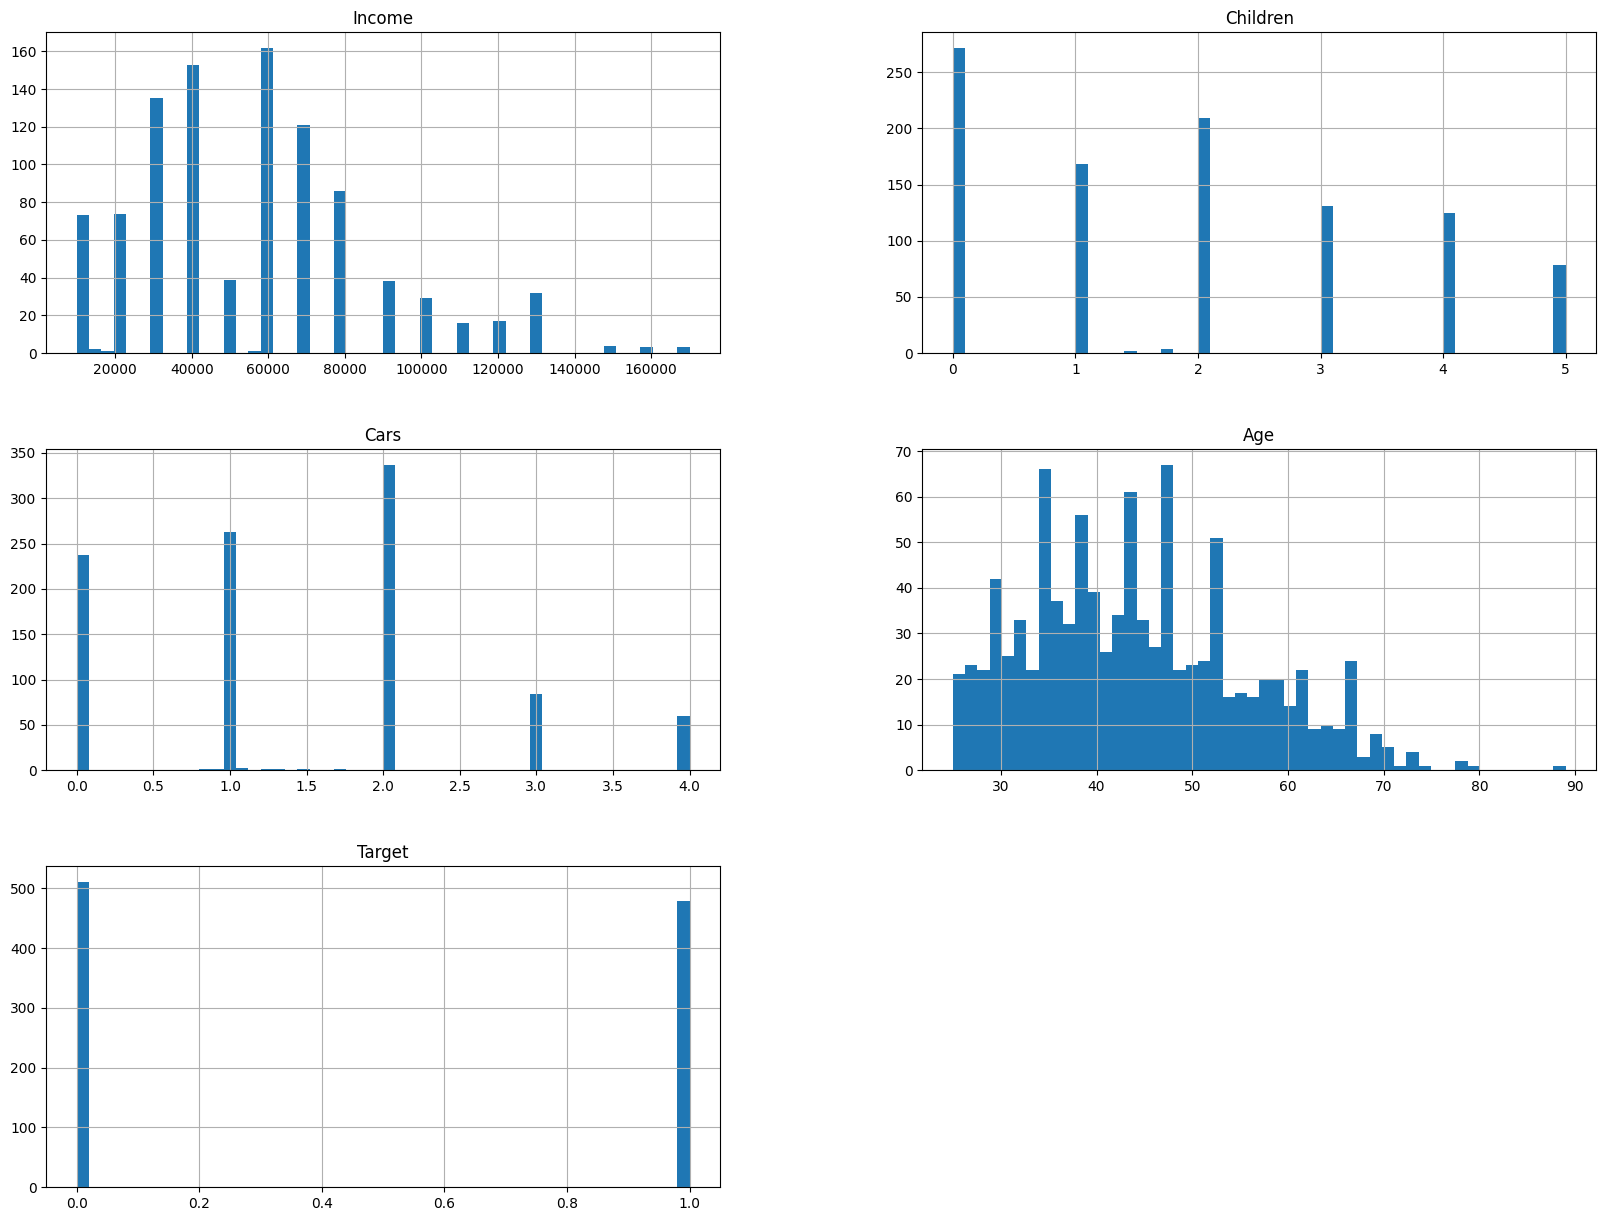

In [888]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
numericas.hist(bins=50,figsize=(20,15))
plt.show()

## Variables Cualitativas

In [889]:
categoricas = df.select_dtypes(include=['object','category'])

In [890]:
categoricas.describe()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region
count,989,989,989,989,989,989,989
unique,2,2,5,5,2,5,3
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America
freq,530,500,301,271,679,358,500


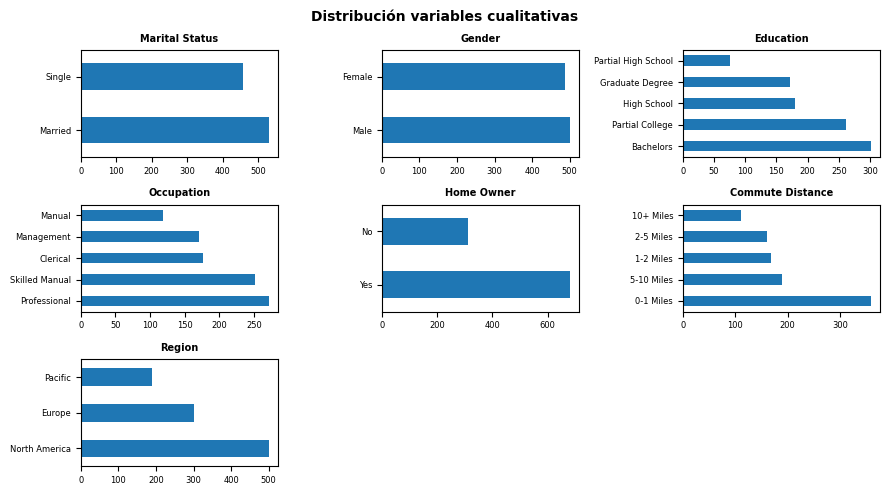

In [891]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

# Modelado

## Creacion y Transformacion de Variables

In [892]:
df_final = df
df_final.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Target
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1
5,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,0


In [893]:
X = df_final.drop(['Target'], axis = 1)

In [894]:
y= df_final.Target

In [895]:
categoricas = X.select_dtypes(include=('object','category')).columns.tolist()
numericas = X.select_dtypes(include=('int64','float64')).columns.tolist()

In [896]:
## Cantidad de Categorías por Variable
variables_str  = X.select_dtypes(include = ['object','category']).columns.tolist()
for var in variables_str:
    print('N de ', var,':',df_final[var].nunique())

N de  Marital Status : 2
N de  Gender : 2
N de  Education : 5
N de  Occupation : 5
N de  Home Owner : 2
N de  Commute Distance : 5
N de  Region : 3


In [897]:
categorical = pd.get_dummies(
    X[categoricas], columns=categoricas, drop_first=True)
categorical.columns = ['Married', 'Male', 'Graduate', 'HighSchool', 'College','PartialSchool',
                       'Management', 'Manual', 'Professional', 'SkilledManual', 'HomeOwner',
                       'Distance1Miles2', 'Distance10Miles10', 'Distance2Miles5',
                       'Distance5Miles10', 'America', 'Pacific']
categorical

,Married,Male,Graduate,HighSchool,College,PartialSchool,Management,Manual,Professional,SkilledManual,HomeOwner,Distance1Miles2,Distance10Miles10,Distance2Miles5,Distance5Miles10,America,Pacific
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0
995,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
996,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
998,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [898]:
numericas
numerical = X[numericas]
numerical

,Income,Children,Cars,Age
0,40000.0,1.0,0.0,42.0
1,30000.0,3.0,1.0,43.0
2,80000.0,5.0,2.0,60.0
4,30000.0,0.0,0.0,36.0
5,10000.0,2.0,0.0,50.0
...,...,...,...,...
994,80000.0,5.0,3.0,46.0
995,60000.0,2.0,2.0,54.0
996,70000.0,4.0,0.0,35.0
998,100000.0,3.0,3.0,38.0


In [899]:
preprocessed_data = pd.merge(numerical, categorical, left_index=True, right_index=True)
preprocessed_data.head()

,Income,Children,Cars,Age,Married,Male,Graduate,HighSchool,College,PartialSchool,...,Manual,Professional,SkilledManual,HomeOwner,Distance1Miles2,Distance10Miles10,Distance2Miles5,Distance5Miles10,America,Pacific
0,40000.0,1.0,0.0,42.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,30000.0,3.0,1.0,43.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,80000.0,5.0,2.0,60.0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,30000.0,0.0,0.0,36.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10000.0,2.0,0.0,50.0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0


## Dividiendo en Entrenamiento y Validación

In [900]:
# Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,y,train_size = 0.8,random_state = 20,stratify = y)

## Seleccion de variables

In [901]:
# Entrenamiento
model_rf_all = model_rf.fit(X_train, y_train)

In [902]:
X_train.columns

Index(['Income', 'Children', 'Cars', 'Age', 'Married', 'Male', 'Graduate',
       'HighSchool', 'College', 'PartialSchool', 'Management', 'Manual',
       'Professional', 'SkilledManual', 'HomeOwner', 'Distance1Miles2',
       'Distance10Miles10', 'Distance2Miles5', 'Distance5Miles10', 'America',
       'Pacific'],
      dtype='object')

In [903]:
#Importancia de las variables
features_rf = pd.DataFrame()
features_rf['variable'] = X_train.columns
features_rf['Importancia'] = model_rf_all.feature_importances_
features_rf.sort_values(by = ['Importancia'],ascending=False,inplace = True)
features_rf.head()

,variable,Importancia
3,Age,0.259064
2,Cars,0.226110
0,Income,0.109736
20,Pacific,0.100012
1,Children,0.077344


<Axes: xlabel='Importancia', ylabel='variable'>

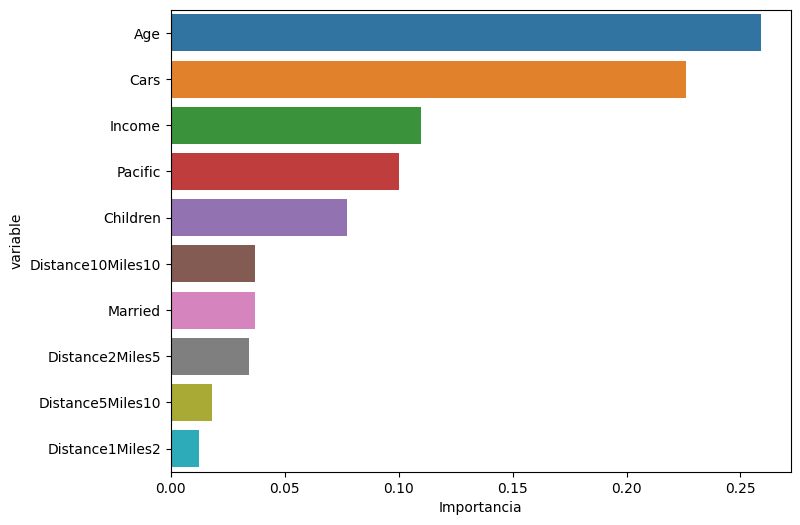

In [904]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
sns.barplot(y='variable',x = 'Importancia',data = features_rf.head(10),
           order =features_rf.head(10)['variable'],
           ax=ax)

## Correlacion de Variables

In [905]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [906]:
corr_matrix = df_final.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
8,Children,Age,0.534149,0.534149
16,Age,Children,0.534149,0.534149
10,Cars,Income,0.447243,0.447243
2,Income,Cars,0.447243,0.447243
7,Children,Cars,0.276866,0.276866
11,Cars,Children,0.276866,0.276866
1,Income,Children,0.257782,0.257782
5,Children,Income,0.257782,0.257782
14,Cars,Target,-0.198505,0.198505
22,Target,Cars,-0.198505,0.198505


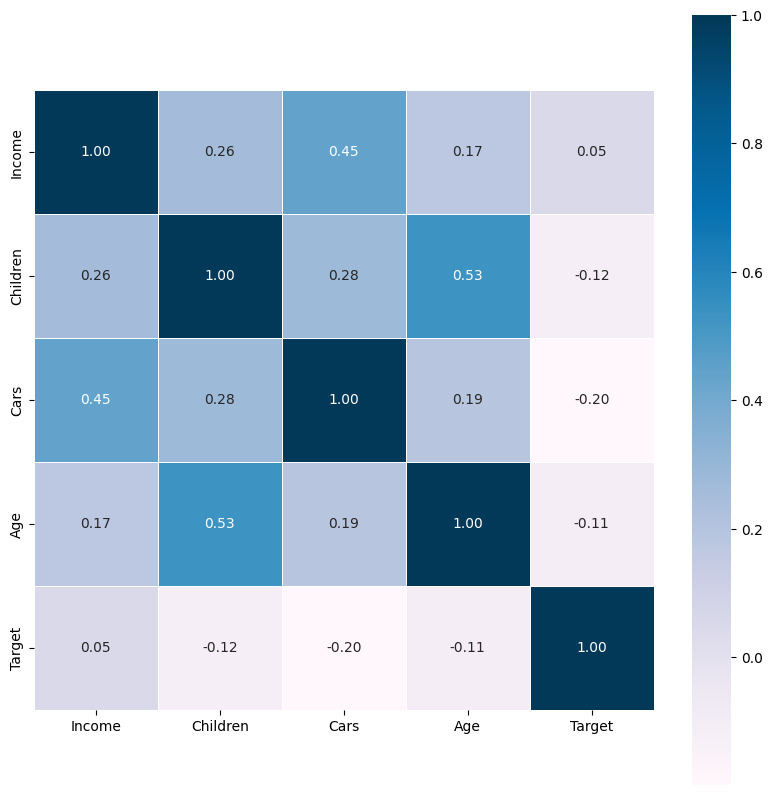

In [907]:
# Heatmap matriz de correlaciones
# ==============================================================================
corr = sns.heatmap(corr_matrix, 
                   vmax = 1, 
                   square = True, 
                   linewidth = 0.5, 
                   yticklabels = True, 
                   xticklabels = True, 
            cbar_kws = {'shrink' : 1}, 
                   annot = True, 
                   fmt = '.2f', 
                   cmap = 'PuBu')
corr.figure.set_size_inches(10,10)

## Eliminamos Variables por alta correlacion

In [908]:
df_final.columns

Index(['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Target'],
      dtype='object')

In [909]:
# df_final = df_final.drop(['Income'], axis = 1)

## Dividiendo la data

In [910]:
from sklearn import preprocessing
from sklearn.calibration import LabelEncoder


preprocessed_data = df_final.copy()

# Elimina las filas con valores faltantes
# preprocessed_data = preprocessed_data.dropna()

escalador = preprocessing.MinMaxScaler(feature_range=(0, 1))
datos_normalizados = escalador.fit_transform([[valor] for valor in preprocessed_data['Income']])

# Codifica las variables categóricas a numéricas
label_encoder = LabelEncoder()
preprocessed_data.insert(0, 'ID', df_index['ID'])
preprocessed_data['Marital Status'] = label_encoder.fit_transform(preprocessed_data['Marital Status'])
preprocessed_data['Gender'] = label_encoder.fit_transform(preprocessed_data['Gender'])
preprocessed_data['Education'] = label_encoder.fit_transform(preprocessed_data['Education'])
preprocessed_data['Occupation'] = label_encoder.fit_transform(preprocessed_data['Occupation'])
preprocessed_data['Home Owner'] = label_encoder.fit_transform(preprocessed_data['Home Owner'])
preprocessed_data['Commute Distance'] = label_encoder.fit_transform(preprocessed_data['Commute Distance'])
preprocessed_data['Region'] = label_encoder.fit_transform(preprocessed_data['Region'])
preprocessed_data['Target'] = label_encoder.fit_transform(preprocessed_data['Target'])
# preprocessed_data['Income'] = label_encoder.fit_transform(preprocessed_data['Income'])
preprocessed_data['Income'] = datos_normalizados
preprocessed_data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Target
0,12496,0,0,0.1875,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,0.1250,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,0.4375,5.0,3,3,0,2.0,3,0,60.0,0
4,25597,1,1,0.1250,0.0,0,0,0,0.0,0,0,36.0,1
5,13507,0,0,0.0000,2.0,3,2,1,0.0,1,0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,0,1,0.4375,5.0,3,3,1,3.0,1,1,46.0,0
995,23731,0,1,0.3125,2.0,2,3,1,2.0,3,1,54.0,1
996,28672,1,1,0.3750,4.0,1,3,1,0.0,3,1,35.0,1
998,19664,1,1,0.5625,3.0,0,1,0,3.0,1,1,38.0,0


In [911]:
x = preprocessed_data.drop('Target', axis=1)
y = preprocessed_data['Target']

In [912]:
# División de los datos en train y test
X_train, X_test, y_train,y_test = train_test_split(x,y,
                                                   train_size = 0.9,random_state = 42,
                                                   stratify = y)

## Regresion Logistica (Clasificacion)

In [913]:
# Declarar el modelo a usar
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,random_state = 42)

In [914]:
# Validación por Cross Validation

skf = StratifiedKFold(n_splits= 5,shuffle=True, random_state = 49)
cross_val = cross_val_score(cv = skf,
                           estimator = rf,# Modelo
                           X=X_train,
                           y=y_train, 
                           scoring = 'accuracy') # 'auc_roc'

print("Todos los scores:",cross_val)
print("Promedio de los scores:",np.mean(cross_val))

Todos los scores: [0.74157303 0.71910112 0.7247191  0.76966292 0.74719101]
Promedio de los scores: 0.7404494382022472


C:\Users\pms_l\AppData\Local\Temp\ipykernel_5684\793331262.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




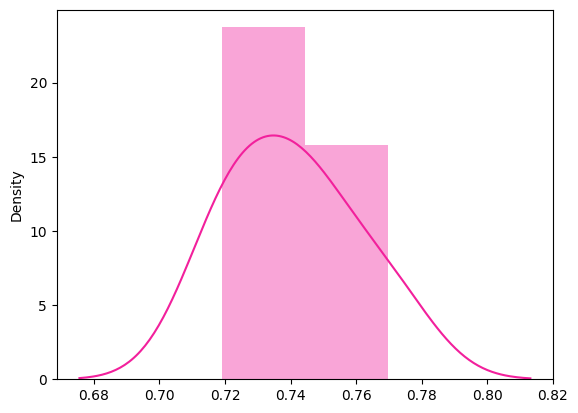

In [915]:
cv_score_rl = cross_val_score(rf, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=1)
sns.distplot(cv_score_rl, color='#f2209c')
plt.savefig('Xval_logreg.png', bbox_inches='tight')

In [916]:
# Entrenamiento del modelo
rf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=42)

In [917]:
# Predecir con el algoritmo entrenado para validar
y_pred_train=rf.predict(X_train) # Prediccion sobre el train
y_pred_test=rf.predict(X_test) # Prediccion sobre el test

              precision    recall  f1-score   support

           0       0.71      0.76      0.74        51
           1       0.73      0.67      0.70        48

    accuracy                           0.72        99
   macro avg       0.72      0.72      0.72        99
weighted avg       0.72      0.72      0.72        99



Text(0, 0.5, 'Y Predichos')

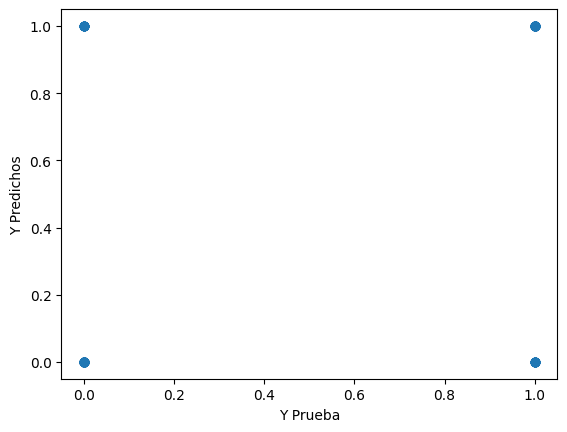

In [918]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')


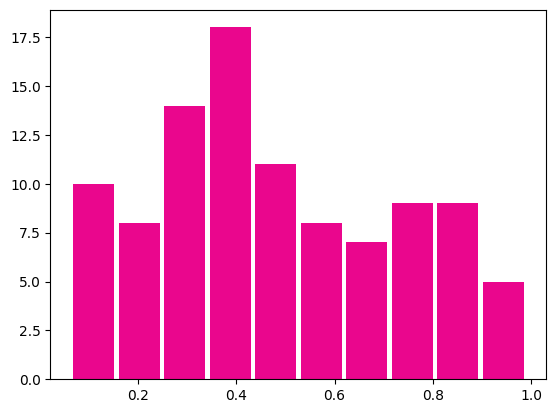

In [919]:
# Calculando probabilidades del modelo
prob_test_rl = rf.predict_proba(X_test)[:,1]
plt.hist(prob_test_rl, color = '#ea068d', rwidth=0.9)
plt.savefig('Probabilidades_logreg.png', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'img/Probabilidades_train_logreg.png'

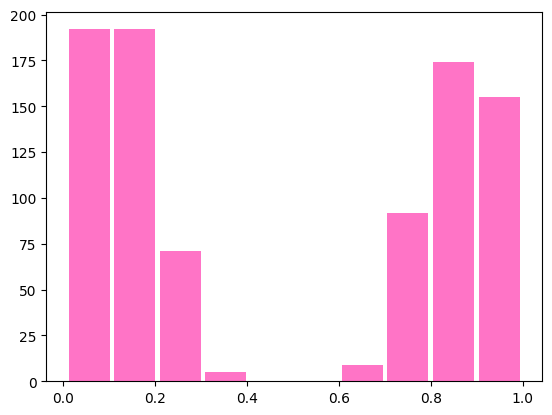

In [929]:
# Calculando las probabilidades para la muestra de entrenamiento
prob_train_rl = rf.predict_proba(X_train)[:,1]
plt.hist(prob_train_rl, color = '#ff74c6', rwidth=0.9)
plt.savefig('Probabilidades_train_logreg.png', bbox_inches='tight')

## Evaluacion del Modelo

In [921]:
## Funciones
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)
    
def fx_evaluate_classif(y_real, pred, pred_proba):
    from sklearn import metrics as mt
    matriz_conf = mt.confusion_matrix(y_real,pred)
    print_mc(matriz_conf)
    roc = mt.roc_auc_score(y_real,pred_proba)
    accuracy_real = mt.accuracy_score(y_real,pred)
    print("\nROC: ", roc) 
    print("Accu:", accuracy_real,'\n')
    print(mt.classification_report(y_real, pred)[0:163])

In [922]:
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_test, y_pred_test, prob_test_rl)

Metricas del Testing...

        Pred_0  Pred_1
Real_0      39      12
Real_1      16      32

ROC:  0.8163807189542484
Accu: 0.7171717171717171 

              precision    recall  f1-score   support

           0       0.71      0.76      0.74        51
           1       0.73      0.67      0.70        48



## Curva de ROC

In [923]:
## AUC: Area bajo la curva
from sklearn import metrics


auc_rl = metrics.roc_auc_score(y_test, prob_test_rl)
auc_rl

0.8163807189542484

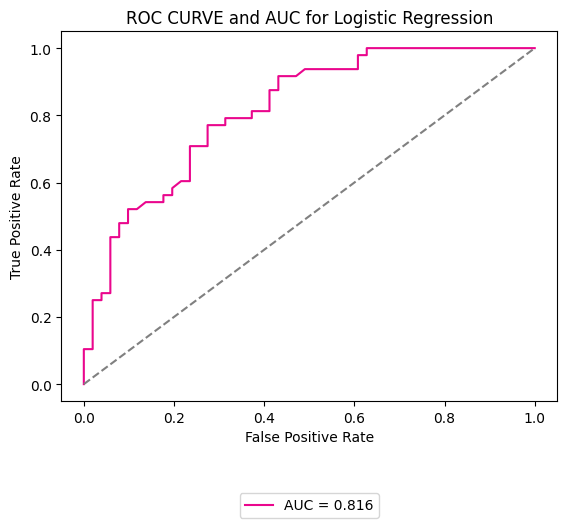

In [924]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test_rl)
plt.plot(fpr, tpr, label= "AUC = " + str(auc_rl.round(3)), color='#ea068d')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC CURVE and AUC for Logistic Regression')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(.5,-0.23), loc='upper center')
plt.savefig('ROC_CURVES_logreg.png', bbox_inches='tight')

##  Resultados del Modelo

In [925]:
y_pred = rf.predict(X_test)

In [926]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Compro = y_test)
df_pred = df_pred.assign(Pred = y_pred.flatten().tolist())
df_pred.head(10)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Compro,Pred
653,13066,1,1,0.1250,0.0,2,4,0,2.0,1,1,31.0,1,0
834,19889,1,0,0.3750,2.0,4,4,0,2.0,3,1,54.0,1,0
471,28323,1,1,0.3750,0.0,0,3,0,2.0,4,2,43.0,1,1
877,15879,0,1,0.3750,5.0,0,1,1,2.0,3,1,61.0,0,0
476,21974,1,0,0.3750,0.0,0,3,1,1.0,4,2,42.0,1,1
360,13082,1,1,0.7500,0.0,1,1,1,0.0,3,2,48.0,1,0
415,13961,0,0,0.4375,5.0,1,1,1,3.0,0,2,40.0,0,0
761,13216,0,0,0.3125,5.0,0,1,1,3.0,2,1,59.0,0,0
105,22707,1,0,0.1250,0.0,3,0,0,1.0,3,0,30.0,0,0
152,17845,1,0,0.0625,0.0,4,2,0,2.0,1,0,32.0,0,0


In [927]:
# Paso 5: Scoring de venta

y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (compra)
scoring = y_pred_proba * 100  # Escala el valor a una puntuación de 0 a 100
results = pd.DataFrame({'Scoring': scoring})
results = results.sort_values(by='Scoring', ascending=False)
print("Scoring de venta:")
print(results)

Scoring de venta:
    Scoring
25     99.0
69     98.5
28     97.7
59     95.3
42     94.6
..      ...
27     12.0
54     10.1
13      8.3
66      6.9
76      6.3

[99 rows x 1 columns]


In [928]:
df_pred['Scoring'] = scoring
df_pred

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Compro,Pred,Scoring
653,13066,1,1,0.125,0.0,2,4,0,2.0,1,1,31.0,1,0,36.9
834,19889,1,0,0.375,2.0,4,4,0,2.0,3,1,54.0,1,0,40.3
471,28323,1,1,0.375,0.0,0,3,0,2.0,4,2,43.0,1,1,51.3
877,15879,0,1,0.375,5.0,0,1,1,2.0,3,1,61.0,0,0,16.1
476,21974,1,0,0.375,0.0,0,3,1,1.0,4,2,42.0,1,1,60.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,27771,1,1,0.125,1.0,0,0,1,1.0,1,0,39.0,1,1,73.9
213,11451,1,1,0.375,0.0,0,3,0,4.0,2,2,31.0,1,0,33.1
743,13296,0,1,0.625,1.0,0,1,1,3.0,4,1,45.0,0,1,56.4
506,25074,0,0,0.375,4.0,0,3,1,2.0,3,1,42.0,1,0,37.0
